# ORF307: Homework 4

## Q1: Fitting a Line with Different Morms (30 pts)

Download the datafile "HW4Q1.csv" for this questions from Canvas/Assignments/HW4/ and use the following code to read the data (you may need to change the path to the one you saved the datafile):

In [92]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from numpy.linalg import lstsq, solve

df = pd.read_csv('../data/HW4Q1.csv')
y = df['y'].values
t = df['t'].values

This will generate two vectors $y,t \in {\mathbf{R}}^{42}$. We are interested in fitting a linear function  $$f(t) = \alpha + \beta t,$$ 
through the points $(t_i, y_i)$, *i.e.*, we want to select $\alpha$ and $\beta$ such that $f(t_i) \approx y_i, i = 1,\dots, 42$.
We can caluclate $\alpha$ and $\beta$ by optimizing the following three criteria.

(a) (10 pts)*Least-squares:* select $\alpha$ and $\beta$ by minimizing $$\sum_{i=1}^{42} (y_i - \alpha - \beta t_i)^2.$$

In [67]:
# Part A Coding Portion

# --- Least Squares (L2) ---
A = np.column_stack([np.ones_like(t), t])
theta, _, _, _ = lstsq(A, y, rcond=None)
alpha_ls, beta_ls = theta

print("--- Least-Squares (L2) Fit ---")
print(f"alpha: {alpha_ls:.6f}, beta: {beta_ls:.6f}")

--- Least-Squares (L2) Fit ---
alpha: 4.184072, beta: 0.575484


(b) (10 pts) $\ell_1$*-norm approximation:* select $\alpha$ and $\beta$ by minimizing $$ \sum_{i=1}^{42} \lvert y_i - \alpha - \beta t_i \rvert.$$

In [68]:
# Part B Coding Portion

# --- L1 Norm Approximation ---
alpha_l1 = cp.Variable()
beta_l1 = cp.Variable()
resid_l1 = y - alpha_l1 - beta_l1 * t
prob_l1 = cp.Problem(cp.Minimize(cp.norm1(resid_l1)))
prob_l1.solve()

alpha_l1_val = alpha_l1.value
beta_l1_val = beta_l1.value

print("\n--- L1 Norm Fit ---")
print(f"alpha: {alpha_l1_val:.6f}, beta: {beta_l1_val:.6f}")


--- L1 Norm Fit ---
alpha: 4.945891, beta: 0.971642


(c) (10 pts) $\ell_\infty$*-norm approximation:* select $\alpha$ and $\beta$ by minimizing $$ \max_{i=1,\dots,42} \lvert y_i - \alpha - \beta t_i \rvert.$$

In [69]:
# Part C Coding Portion

# --- L_infinity Norm Approximation ---
alpha_linf = cp.Variable()
beta_linf = cp.Variable()
resid_linf = y - alpha_linf - beta_linf * t
prob_linf = cp.Problem(cp.Minimize(cp.norm_inf(resid_linf)))
prob_linf.solve()

alpha_linf_val = alpha_linf.value
beta_linf_val = beta_linf.value

print("\n--- L∞ Norm Fit ---")
print(f"alpha: {alpha_linf_val:.6f}, beta: {beta_linf_val:.6f}")


--- L∞ Norm Fit ---
alpha: 3.933516, beta: -0.524903


Find the optimal values of $\alpha$ and $\beta$ for each of the three optimization criteria. This yields three linear functions $f_{\rm ls}(t), f_{\ell_1}(t), f_{\ell_\infty}$. Plot the 42 data points, and the three functions $f$. What do you observe?

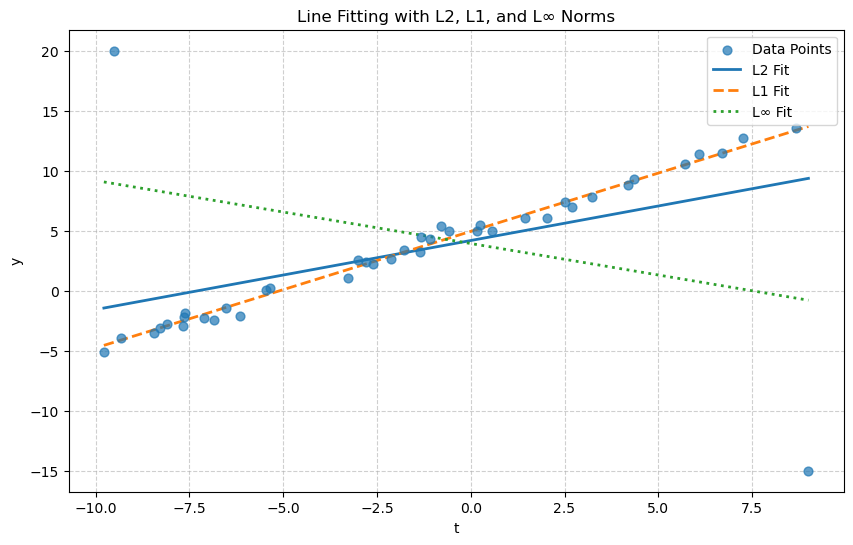

In [70]:
# Question 1 Extra Coding Section

# --- Plotting ---
tt = np.linspace(t.min(), t.max(), 400)
f_ls = alpha_ls + beta_ls * tt
f_l1 = alpha_l1_val + beta_l1_val * tt
f_linf = alpha_linf_val + beta_linf_val * tt

plt.figure(figsize=(10, 6))
plt.scatter(t, y, s=40, label="Data Points", zorder=3, alpha=0.7)
plt.plot(tt, f_ls, linewidth=2, linestyle='-', label="L2 Fit")
plt.plot(tt, f_l1, linewidth=2, linestyle='--', label="L1 Fit")
plt.plot(tt, f_linf, linewidth=2, linestyle=':', label="L∞ Fit")

plt.xlabel("t")
plt.ylabel("y")
plt.title("Line Fitting with L2, L1, and L∞ Norms")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('Q1_line_fitting.png')
plt.show()

## Q2: Linear Programs with Absolute Values (30 pts)

Consider the problem

$$
\begin{array}{ll}\tag{1}
\text{minimize} &2x_1 + 3 \lvert x_2 - 10 \rvert\\
\text{subject to} &\lvert x_1 + 2 \rvert + \lvert x_2 \rvert \le 5,
\end{array}
$$

(a) (10 pts) Reformulate this as a linear program.

See the written portion above for the solution

(b) (10 pts) Reformulate this as a linear program in standard form.

See the written portion above for the solution

(c) (10 pts) Solve problem (1) graphically.

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


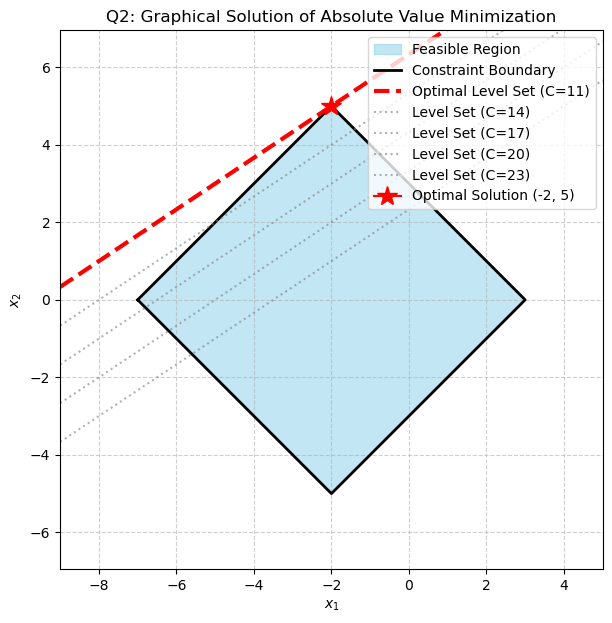

In [71]:
# Part C Coding Portion

verts = np.array([[-7, 0], [-2, 5], [3, 0], [-2, -5]])
xv, yv = verts[:, 0], verts[:, 1]

plt.figure(figsize=(7, 7))

plt.fill(xv, yv, color='skyblue', alpha=0.5, label="Feasible Region")

closed_verts = np.vstack([verts, verts[0]])
plt.plot(closed_verts[:, 0], closed_verts[:, 1], 'k-', linewidth=2, label="Constraint Boundary")

x1 = np.linspace(-9, 5, 400)
alphas = [11, 14, 17, 20, 23]

for alpha in alphas:
    y = 10 - (alpha - 2 * x1) / 3.0
    if alpha == 11:
        plt.plot(x1, y, color='red', linestyle="--", linewidth=3, label=f"Optimal Level Set (C={alpha})")
    else:
        plt.plot(x1, y, color='gray', linestyle=":", alpha=0.6, label=f"Level Set (C={alpha})")

plt.plot(-2, 5, marker="*", markersize=15, color="red", zorder=5, label=f"Optimal Solution (-2, 5)")

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Q2: Graphical Solution of Absolute Value Minimization")
plt.legend(loc="upper right")
plt.axis("equal")
plt.xlim(-9, 5)
plt.ylim(-6, 6)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('Q2_graphical_solution_detailed.png')

### Part C Written Portion

The problem is to minimize $f(x_1, x_2) = 2x_1 + 3|x_2 - 10|$ within the region defined by $|x_1 + 2| + |x_2| \le 5$. The constraint forms a **diamond-shaped** feasible region in the $x_1$-$x_2$ plane with a maximum $x_2$ value of $5$ at the point $(-2, 5)$.

The objective function has two competing terms: $2x_1$ which pushes the solution to the far left and $3|x_2 - 10|$ which pushes $x_2$ toward $10$, which means maximizing $x_2$ within the feasible range. Since the $x_2$ term has a larger coefficient (3 vs. 2 for $x_1$), maximizing $x_2$ is the priority to minimize the overall cost. The point that achieves the highest feasible $x_2$ is the vertex $(-2, 5)$.

At this point: * $f(-2, 5) = 2(-2) + 3|5 - 10| = -4 + 3(5) = 11$.

The optimal level set $f(\mathbf{x})=11$ is the first to touch the feasible region at this single vertex, thus the optimal solution is $(-2, 5)$ with a value of $11$.

## Q3: Optimal Illumination (40 pts)

We consider an illumination system of m lamps, at positions $l_1, . . . , l_m \in {\mathbf{R}}^2$
, illuminating n flat patches.

![image.png](image.png)

The patches are line segments; the ith patch is given by $[v_i
, v_{i+1}]$ where $v_1, \dots , v_{n+1} \in \mathbf{R}^2$. The variables in the problem are the lamp powers $p_1, \dots , p_m$, which can vary between 0 and 1. The illumination at (the midpoint of) patch $i$ is denoted $I_i$. We will use a simple model for the illumination:

$$ I_i = \sum_{j=1}^m a_{ij} p_j, \qquad a_{ij} = r_{ij}^{-2} \max\{\cos \theta_{ij},0 \},$$

where $r_{ij}$ denotes the distance between lamp $j$ and the midpoint of patch $i$, and $θ_{ij}$ denotes the angle between the upward normal of patch $i$ and the vector from the midpoint of patch $i$ to lamp $j$, as shown in the figure. This model takes into account “self-shading” (*i.e.*, the fact that a patch is illuminated only by lamps in the halfspace it faces) but not shading of
one patch caused by another. Of course we could use a more complex illumination model, including shading and even reflections. This just changes the matrix relating the lamp powers to the patch illumination levels.

The problem is to determine lamp powers that make the illumination levels close to a given desired illumination level $I_{\rm des}$, subject to the power limits $0 \le p_i \le 1$.

(a) (10 pts) Suppose we use the maximum deviation $$\phi(p) = \max_{k=1,\dots,n} \lvert I_k - I_{\rm des}\rvert$$ as a measure for the deviation from the desired illumination level. Formulate the illumination problem using this criterion as a linear optimization problem.

## Part A Written Portion

Reoriented, the desired problem is:
$$\min_{\mathbf{p}} \quad \phi(\mathbf{p}) = \max_{k=1,\dots,n} |I_k - I_{des}| \quad \text{subject to } 0 \le p_j \le 1, \quad j=1,\dots,m$$
where $I_k = \sum_{j=1}^{m} a_{kj} p_j$.

The non-linear objective $\min \max_k |I_k - I_{des}|$ is transformed into a standard LP by introducing a scalar auxiliary variable, **$z$**, representing the maximum deviation, $\phi(\mathbf{p})$.

Substituting $I_k$ with $\sum_{j=1}^{m} a_{kj} p_j$ and rearranging to match the standard $\mathbf{A}_{\text{ub}} \mathbf{x} \le \mathbf{b}_{\text{ub}}$ form:

\begin{aligned}
\min_{\mathbf{p}, z} \quad & z \\
\text{s.t.} \quad & \sum_{j=1}^{m} a_{kj} p_j - z \le I_{des} & \quad \text{for } k=1,\dots,n \\
& -\sum_{j=1}^{m} a_{kj} p_j - z \le -I_{des} & \quad \text{for } k=1,\dots,n \\
& 0 \le p_j \le 1 & \quad \text{for } j=1,\dots,m \\
& z \ge 0
\end{aligned}

(b) (20 pts) There are several suboptimal approaches based on weighted least-squares. You are given $A$ (where the entries of $A$ are $a_{ij}$ in the model for illumination) and $I_{\rm des}$. Download the datafile "HW4Q3.csv" from Canvas/Assignments/HW4 and read the data using the following code  (you may need to change the path to the one you saved the datafile):

In [89]:
# A_pd = pd.read_csv('/content/drive/MyDrive/HW4Q3.csv', header=None)
A = pd.read_csv("../data/HW4Q3.csv", header=None).to_numpy()
n, m = A.shape
I_des = 2.0
y = I_des * np.ones((n,1))

def eval_phi(p):
    return np.max(np.abs(A @ p - I_des))

We consider two examples.

1. *Saturated least-squares.* We can solve the least-squares problem $$ \text{minimize}\quad \sum_{k=1}^n (I_k − I_{\rm des})^2$$ 

ignoring the constraints. If the solution is not feasible, we saturate it, *i.e.*, set $p_j = 0$ if $p_j \le 0$ and $p_j = 1$ if $p_j \ge 1$. Compute a feasible $p$ using this first method, and calculate $\phi(p)$.

2. *Weighted least-squares.* We consider another least-squares problem: $$ \text{minimize}\quad  \sum_{k=1}^n (I_k − I_{\rm des})^2 + \mu \sum_{i=1}^m (p_i - 0.5)^2,$$ 

where $\mu \ge 0$ is used to attach a cost to a deviation of the powers from the value 0.5, which lies in the middle of the power limits. For large enough $\mu$, the solution of this problem will satisfy $0 \le p_i \le 1$, *i.e.*, be feasible for the original problem. Again, using the same $A$ and $I_{\rm des}$, find the smallest $\mu$ such that $p$ becomes feasible, and evaluate $\phi(p)$.

In [90]:
# Part B Coding Portion

# Subsection 1
p1 = cp.Variable((m,1))
objective1 = cp.Minimize(cp.sum_squares(A @ p1 - I_des))
prob1 = cp.Problem(objective1)
prob1.solve()

p1_val = p1.value.copy()
p1_sat = np.clip(p1_val, 0, 1)
phi_sat = eval_phi(p1_sat)

print("=== Part (b.1) Saturated LS ===")
print(f"phi(p_sat) = {phi_sat:.6f}")
print("first 8 p_sat:", np.round(p1_sat[:8].flatten(), 6), "\n")

# Subsection 2
mu = 10.0
p2 = cp.Variable((m,1))
objective2 = cp.Minimize(cp.sum_squares(A @ p2 - I_des) +
                         mu * cp.sum_squares(p2 - 0.5))
prob2 = cp.Problem(objective2)
prob2.solve()

p2_val = p2.value
phi_mu = eval_phi(p2_val)

print("=== Part (b.2) Weighted LS ===")
print(f"mu = {mu:.6g}, phi(p_mu) = {phi_mu:.6f}")
print("first 8 p_mu:", np.round(p2_val[:8].flatten(), 6), "\n")

=== Part (b.1) Saturated LS ===
phi(p_sat) = 3.246956
first 8 p_sat: [1.       0.       0.523226 0.       1.       0.       0.      ] 

=== Part (b.2) Weighted LS ===
mu = 10, phi(p_mu) = 1.335509
first 8 p_mu: [0.555125 0.47945  0.003948 0.352554 0.392661 0.464324 0.453925] 



(c) (10 pts) Using the same data as in part (b), solve the LP you derived in part (a). Compare the solution with the solutions you obtained using the (weighted) least-squares methods of part (b).


In [91]:
# Part C Coding Portion
p3 = cp.Variable((m,1))
s = cp.Variable(nonneg=True)

constraints3 = [p3 >= 0, p3 <= 1,
                s >= A @ p3 - I_des,
                s >= -A @ p3 + I_des]

objective3 = cp.Minimize(s)
prob3 = cp.Problem(objective3, constraints3)
prob3.solve()

p3_val = p3.value
phi_lp = eval_phi(p3_val)

print("=== Part (c) LP solution ===")
print(f"phi(p_lp) = {phi_lp:.6f}")
print("first 8 p_lp:", np.round(p3_val[:8].flatten(), 6), "\n")

# === Comparison ===
print("=== Summary Comparison ===")
print(f"Saturated LS phi: {phi_sat:.6f}")
print(f"Weighted LS  phi: {phi_mu:.6f}")
print(f"LP (optimal) phi: {phi_lp:.6f}")


=== Part (c) LP solution ===
phi(p_lp) = 1.052939
first 8 p_lp: [1.       0.570809 0.       0.       0.       0.370581 1.      ] 

=== Summary Comparison ===
Saturated LS phi: 3.246956
Weighted LS  phi: 1.335509
LP (optimal) phi: 1.052939
